# Distribuição Normal

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco<br>
Copyright: Creative Commons<br>

<hr>

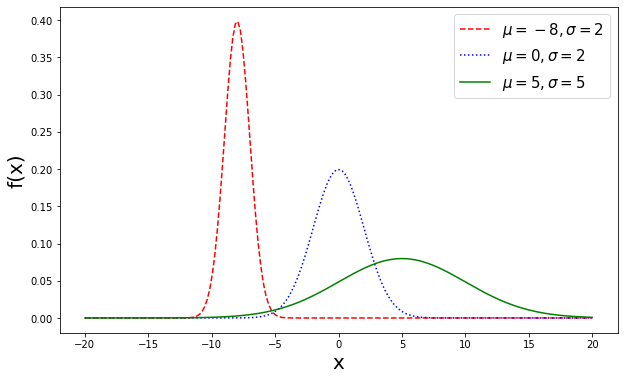

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
plt.figure(figsize=(10,6))

# define os valores de x
mean = -8
sigma = 1
x = np.linspace(-20,20,200)
pdf = normal_dist(x,mean,sigma)
plt.plot(x,pdf , color = 'red',linestyle = 'dashed', label=r'$\mu=-8, \sigma =2$')

# define os valores de x
mean = 0
sigma = 2
pdf = normal_dist(x,mean,sigma)
plt.plot(x,pdf , color = 'blue',linestyle = 'dotted', label=r'$\mu=0, \sigma =2$')

# define os valores de x
mean = 5
sigma = 5
pdf = normal_dist(x,mean,sigma)
plt.plot(x,pdf , color = 'green', label=r'$\mu=5, \sigma =5$')

#Plotting the Results
plt.xlabel('x',fontsize = 20)
plt.ylabel('f(x)',fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig('normal.svg')
plt.show()

Podemos resolver alguns exemplos para verificar algumas aplicações dessa distribuição.

**Exemplo**: Se $X \sim  \mathcal{N}(\mu=165,\,\sigma^{2}=9)$, calcule $P(X<162)$.

In [29]:
import scipy.stats as st

media = 165
dp = 3
z = (162-media)/dp
print('Z:', z)
print('P(X < 162) = ', st.norm.cdf(z))

Z: -1.0
P(X < 162) =  0.15865525393145707


**Exemplo**: Se $X \sim  \mathcal{N}(\mu=10,\,\sigma^{2}=4)$, calcule $P(X>13)$.

In [4]:
import scipy.stats as st

media = 10
dp = 2
z = (13-media)/dp
print('Z:', z)
print('P(X > 13)=', 1-st.norm.cdf(z))

Z: 1.5
P(X > 13)= 0.06680720126885809


**Exemplo**: Se $X \sim \mathcal{N}(\mu=5,\sigma^2=4)$, calcule $P(4 \leq X \leq 6)$. 

In [18]:
import scipy.stats as st

media = 5
dp = 2
z1 = (4-media)/dp
z2 = (6-media)/dp
print('z1=',z1,'z2=',z2)
print('P(4 < X < 6)=', st.norm.cdf(z2)- st.norm.cdf(z1))

z1= -0.5 z2= 0.5
P(4 < X < 6)= 0.38292492254802624


**Exemplo:** O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 70 Kg e o desvio padrão é 5 Kg. Admitindo que os pesos são normalmente distribuídos, de forma aproximada, determine a percentagem de estudantes que pesam entre 65 Kg e 75 Kg.

$$
\begin{aligned}
P(65\leq X \leq 75) &=  P\left(\frac{65-\mu}{\sigma} \leq \frac{X-\mu}{\sigma} \leq \frac{75 - \mu}{\sigma} \right) = \\
& =  P\left(\frac{65-70}{5} \leq Z \leq \frac{75 -70}{5} \right) =  \\ 
& = P(Z \leq 1) - P(Z \leq -1) = 0,68.
\end{aligned}
$$

In [35]:
import scipy.stats as st
media = 70
dp = 5
z1 = (65-media)/dp
z2 = (75 -media)/dp
print('z1=',z1,'z2=',z2)
print('Probabilidade teórica:',st.norm.cdf(z2)-st.norm.cdf(z1))

z1= -1.0 z2= 1.0
Probabilidade teórica: 0.6826894921370859


Simulando:

In [36]:
import numpy as np
media = 70
dp = 5
n = 100
X = np.random.normal(media, dp, n)
m = 0
for x in X:
    if x > 65 and x < 75:
        m = m + 1
print('Probabilidade (simulação):', m/n)

Probabilidade (simulação): 0.64


b) mais do que 80 Kg. 

In [30]:
z1 = (80-media)/dp
p = 1-st.norm.cdf(z1)
print('Probabilidade teórica:',p)

Probabilidade teórica: 0.02275013194817921


In [32]:
media = 70
dp = 5
n = 100
X = np.random.normal(media, dp, n)
m = 0
for x in X:
    if x > 80:
        m = m + 1
print('Probabilidade (simulação):', m/n)

Probabilidade (simulação): 0.03


**Exemplo:** Uma máquina de bebidas está regulada de modo a servir uma média de 150ml por copo. Se a quantidade servida por copo seguir uma distribuição normal com desvio padrão de 20 ml, determine a percentagem de copos que conterão mais de 175ml de bebida.

$$
P(X \geq 175) = P\left( \frac{X-\mu}{\sigma}\geq \frac{175-\mu}{\sigma}\right) = P\left( Z \geq \frac{175-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{175-\mu}{\sigma}\right)
$$

In [61]:
media = 150
dp = 20
z = (175-media)/dp
print((1-st.norm.cdf(z))*100,'%')

10.564977366685536 %


Comparando a curva teórica com simulações:

Text(0, 0.5, 'Probability Density')

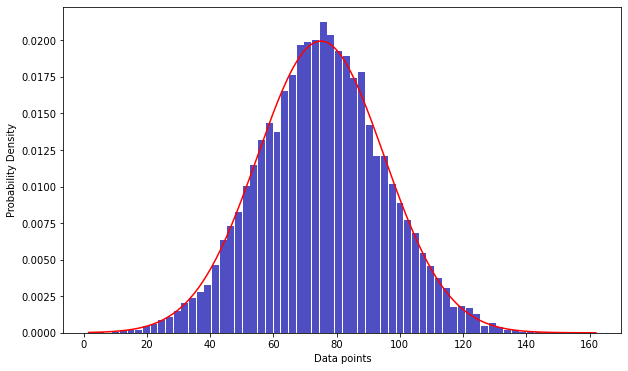

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
 
# funcao que mostra a distribuicao teorica
def normal_dist(x , mean , sigma):
    prob_density = (1/(sigma*(math.sqrt(2*np.pi))))*np.exp(-0.5*((x-mean)/sigma)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = 75
sigma = 20
n = 10000
X = np.random.normal(mean, sigma, n)
plt.figure(figsize=(10,6))
Pk, bins, ignored = plt.hist(X, bins='auto', density=True, color='#0504aa',alpha=0.7, 
                                rwidth=0.9)

# define os valores de x
x = np.linspace(np.min(X),np.max(X),200)
# Distribuicao teorica
pdf = normal_dist(x,mean,sigma)

#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

Aproximação da binomial pela normal.

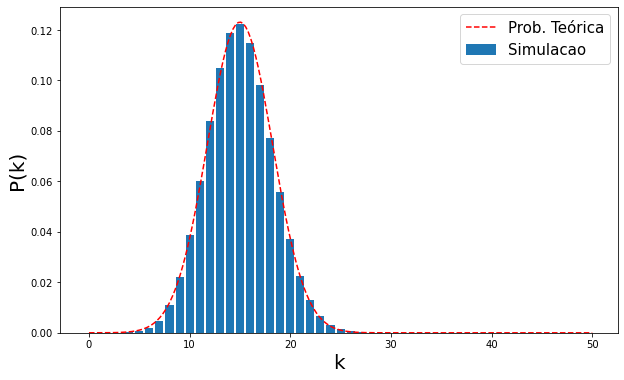

In [45]:
from random import seed
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import binom
import math

seed(100) # semente do gerador de números aleatórios

n = 50 # numero de lançamentos
p = 0.3 # probabilidade de sair cara
vk = np.arange(0,n)
Pk = [binom.pmf(k, n, p) for k in vk]

plt.figure(figsize=(10,6))
plt.bar(vk, Pk, label='Simulacao')


# curva normal
x = np.linspace(0,n,200)
mean = n*p
sigma = np.sqrt(n*(1-p)*p)
pdf = normal_dist(x,mean,sigma)
plt.plot(x, pdf, 'r--', label='Prob. Teórica')
plt.xlabel('k', fontsize = 20)
plt.ylabel('P(k)',fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig('binomial-normal.svg')
plt.show(True)

### Exercícios:

1 - Uma fábrica usa garrafas de refrigerante de 260 ml.  Uma máquina é usada para encher essa garrafas. Assumindo que a quantidade colocada pela máquina tem distribuição normal com média 250 ml e desvio padrão de 10 ml, qual é a porcentagem de garrafas que transbordarão?


In [49]:
media = 250
dp = 10
x = 260
z = (x-media)/dp
print((1-st.norm.cdf(z))*100,'%')

15.865525393145708 %


2 -  Se $X \sim \mathcal{N}(\mu=10,\sigma^2=9)$, calcule $P(8 \leq X \leq 11)$. 


In [50]:
import scipy.stats as st
media = 10
dp = 3
z1 = (8-media)/dp
z2 = (11 -media)/dp
print('z1=',z1,'z2=',z2)
print('Probabilidade teórica:',st.norm.cdf(z2)-st.norm.cdf(z1))

z1= -0.6666666666666666 z2= 0.3333333333333333
Probabilidade teórica: 0.3780661222713134


3- Em uma cidade, 46\% da população vota em um certo candidato a prefeito. Uma amostra de 500 pessoas é sorteada. Usando a aproximação da distribuição binomial pela normal, calcule a probabilidade de que ao menos 250 pessoa votarão nesse candidato.


In [65]:
import numpy as np
n = 500
p = 0.46
media = n*p
dp = np.sqrt(n*(1-p)*p)
x = 250
z = (x-media)/dp
print((1-st.norm.cdf(z)))

0.0363582211398783
